In [ ]:
pip install yfinance

In [ ]:
import yfinance as yf


In [ ]:
df = yf.download(tickers='BTC-USD')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [ ]:
df

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2014-09-17,457.334015,468.174011,452.421997,465.864014,21056800
2014-09-18,424.440002,456.859985,413.104004,456.859985,34483200
2014-09-19,394.795990,427.834991,384.532013,424.102997,37919700
2014-09-20,408.903992,423.295990,389.882996,394.673004,36863600
2014-09-21,398.821014,412.425995,393.181000,408.084991,26580100
...,...,...,...,...,...
2025-05-13,104169.812500,104997.421875,101515.093750,102812.492188,52608876410
2025-05-14,103539.414062,104303.562500,102618.296875,104167.328125,45956071155


In [ ]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
df.columns


MultiIndex([( 'Close', 'BTC-USD'),
            (  'High', 'BTC-USD'),
            (   'Low', 'BTC-USD'),
            (  'Open', 'BTC-USD'),
            ('Volume', 'BTC-USD')],
           names=['Price', 'Ticker'])

In [ ]:
import yfinance as yf
df = yf.download(tickers='BTC-USD')

# Drop multi-index column level
df.columns = df.columns.droplevel(1)

df.columns  # To confirm it's now: ['Open', 'High', 'Low', 'Close', 'Volume']


[*********************100%***********************]  1 of 1 completed


Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')

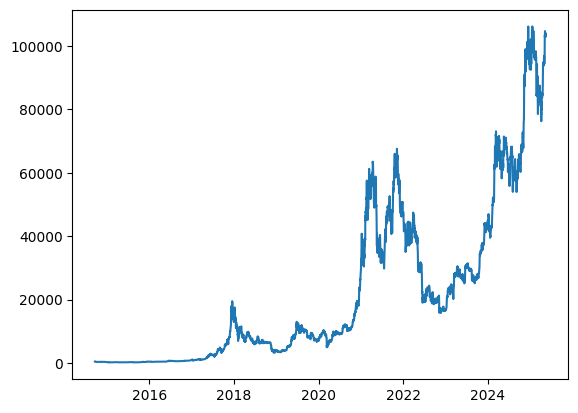

In [ ]:
plt.plot(df.index, df['Close'])

In [ ]:
# Train test split
to_row = int(len(df)*0.9)

training_data = list(df['Close']
)
testing_data = list(df['Close']
)


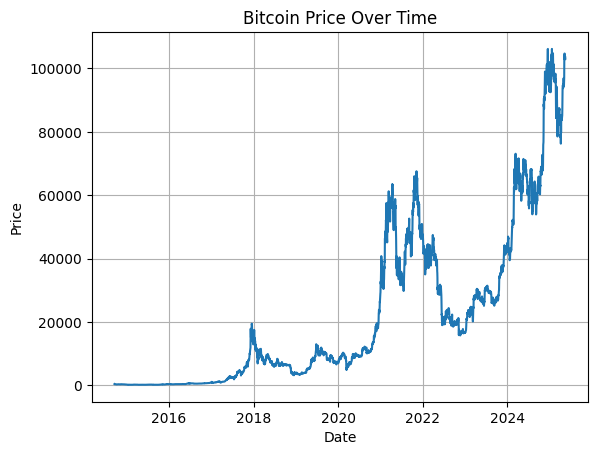

In [ ]:
plt.plot(df.index, df['Close'])
plt.title("Bitcoin Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.show()


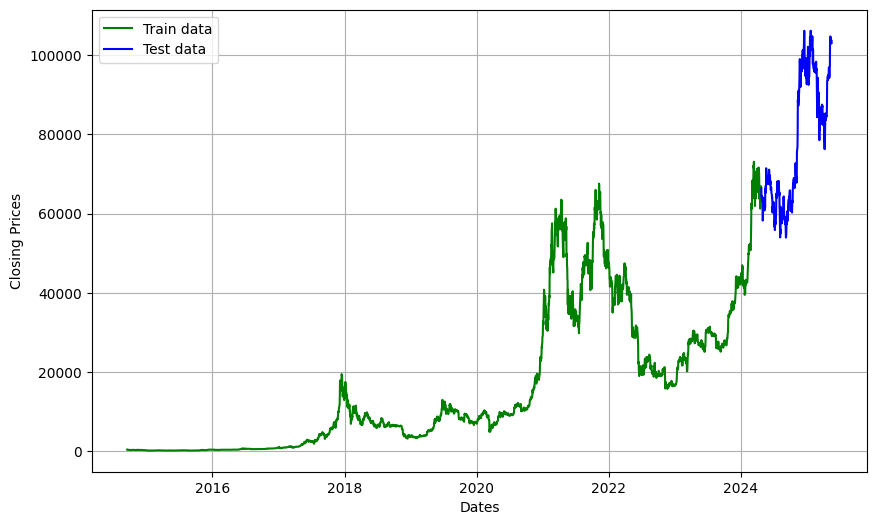

In [ ]:
# Split data into train and test set
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df[0:to_row]['Close'], 'green', label='Train data')
plt.plot(df[to_row:]['Close'], 'blue', label='Test data')
plt.legend()


In [ ]:
model_predictions = []
n_test_obser = len(testing_data)


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
from statsmodels.tsa.arima.model import ARIMA  # <-- new import

model_predictions = []
n_test_obser = len(testing_data)

for i in range(n_test_obser):
    model = ARIMA(training_data, order=(4, 1, 0))
    model_fit = model.fit()
    yhat = model_fit.forecast(steps=1)[0]
    model_predictions.append(yhat)
    actual_test_value = testing_data[i]
    training_data.append(actual_test_value)

In [ ]:
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 8519
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -73825.795
Date:                Sat, 17 May 2025   AIC                         147661.590
Time:                        19:22:18   BIC                         147696.840
Sample:                             0   HQIC                        147673.618
                               - 8519                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0139      0.009     -1.503      0.133      -0.032       0.004
ar.L2          0.0076      0.012      0.625      0.532      -0.016       0.031
ar.L3          0.0013      0.015      0.087      0.9

In [ ]:
test_size = 390
training_data = list(df['Close'][:-test_size])
testing_data = list(df['Close'][-test_size:])


In [ ]:
model_predictions = []
for i in range(len(testing_data)):
    model = ARIMA(training_data, order=(4,1,0))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    model_predictions.append(yhat)
    training_data.append(testing_data[i])


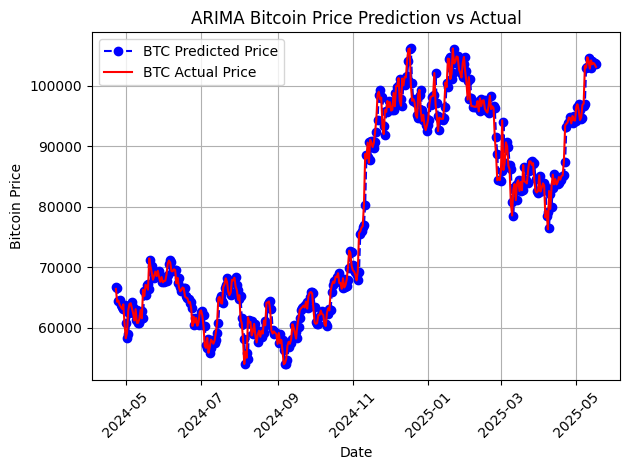

In [ ]:
date_range = df.index[-test_size:]  # last 390 days
plt.plot(date_range, model_predictions, color='blue', marker='o', linestyle='dashed', label='BTC Predicted Price')
plt.plot(date_range, testing_data, color='red', label='BTC Actual Price')
plt.xlabel('Date')
plt.ylabel('Bitcoin Price')
plt.title('ARIMA Bitcoin Price Prediction vs Actual')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
mape = np.mean(np.abs(np.array(model_predictions) - np.array(testing_data)) / np.abs(testing_data))
print('MAPE:', mape)
print(f"MAPE: {mape * 100:.2f}%")


MAPE: 0.01885717231321147
MAPE: 1.89%


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
<ipython-input-31-8e354743e882>:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  predicted_price = forecast[-1]


✅ Predicted Bitcoin Price on 2025-06-30: $103068.16


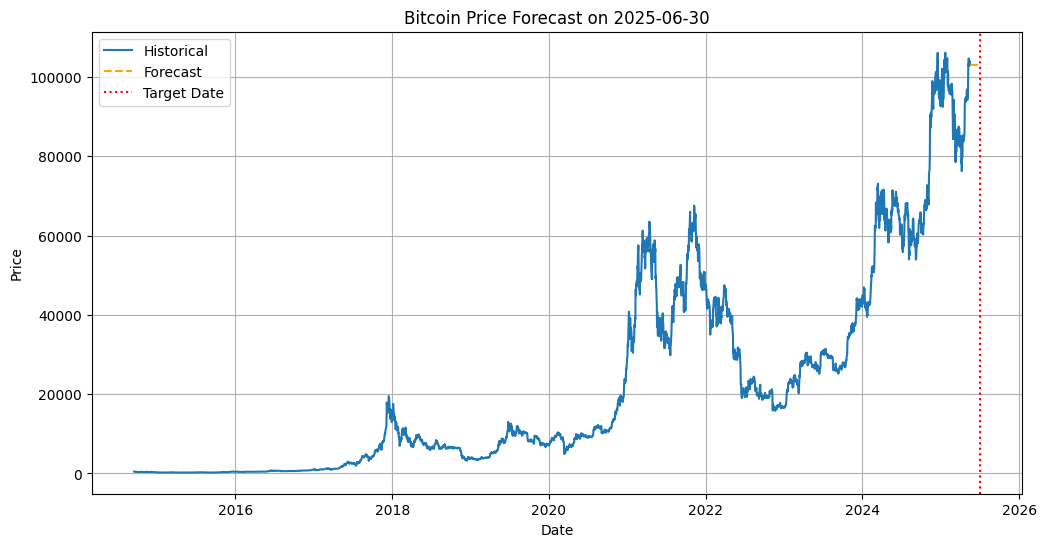

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

# 1. Train on entire available data
model = ARIMA(df['Close'], order=(4,1,0))
model_fit = model.fit()

# 2. Set your target date
target_date = datetime(2025, 6, 30)

# 3. Calculate how many days to forecast ahead
last_date = df.index[-1]
days_ahead = (target_date - last_date).days

# 4. Make the forecast if the date is in the future
if days_ahead > 0:
    forecast = model_fit.forecast(steps=days_ahead)
    predicted_price = forecast[-1]
    print(f"✅ Predicted Bitcoin Price on {target_date.date()}: ${predicted_price:.2f}")

    # Optional: Plot the forecast
    forecast_index = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=days_ahead)
    plt.figure(figsize=(12,6))
    plt.plot(df.index, df['Close'], label='Historical')
    plt.plot(forecast_index, forecast, label='Forecast', linestyle='dashed', color='orange')
    plt.axvline(x=target_date, color='red', linestyle=':', label='Target Date')
    plt.title(f'Bitcoin Price Forecast on {target_date.date()}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("⚠️ That date is already within historical data. Use actual data instead.")
